In [1]:
import numpy as np
import matplotlib.pyplot as pp
import random
import scipy.special as sp
import scipy.integrate as spi

### 1.

A selection of a random sequence of ten pebbles with replacement yields: ['white', 'black', 'black', 'white', 'black', 'white', 'white', 'black', 'white', 'white']
The proportion of the sample that is black: 0.4
The distribution is discrete because it can only be a value between 0 and 1 in 0.1 increments


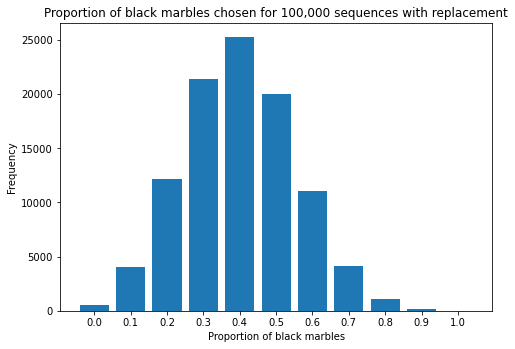

In [2]:
random.seed(270)

OPTS = ['white', 'black']
WEIGHTS = [15, 10]

NUM_BLACK = ['black' for i in range(10)]
NUM_WHITE = ['white' for i in range(15)]
POPULATION = NUM_BLACK + NUM_WHITE

def getPebbleSequence(n, replacement=True):
    if(replacement):
        return random.choices(POPULATION, k=n)
    else:
        return random.sample(POPULATION, k=n)

def getFrequencies(seq):
    return round(seq.count('white'), 4) / len(seq), round(seq.count('black') / len(seq), 4)
        

tenSequence = getPebbleSequence(10)
freqs = getFrequencies(tenSequence)
print(f"A selection of a random sequence of ten pebbles with replacement yields: {tenSequence}")
print(f"The proportion of the sample that is black: {freqs[1]}")

blackProp = []
for i in range(100000):
    blackProp.append(getFrequencies(getPebbleSequence(10))[1])
print(f"The distribution is discrete because it can only be a value between 0 and 1 in 0.1 increments")

freqsRep = {0 : 0,
         0.1 : 0,
         0.2 : 0,
         0.3 : 0,
         0.4 : 0,
         0.5 : 0,
         0.6 : 0,
         0.7 : 0,
         0.8 : 0,
         0.9 : 0,
         1 : 0,}
# count occurrences of each proportion
for prop in blackProp:
    freqsRep[prop] += 1

# set up and show plot
fig = pp.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(freqsRep.keys(), freqsRep.values(), width=.08)
ax.set_title("Proportion of black marbles chosen for 100,000 sequences with replacement")
ax.set_ylabel("Frequency")
ax.set_xlabel("Proportion of black marbles")
ax.set_xticks(np.arange(0, 1.1, .1))
pp.show()

The priori expected value for the experiment is 10/25 = 0.4. We can calculate the actual average value via the code snipped below:

In [3]:
actualMean = np.mean(blackProp)
print(f"The actual mean is: {round(actualMean, 4)}")

The actual mean is: 0.3998


Considering the actual value is 0.3998, which is very close to 0.4, the results of the simulation do agree with the priori expected value

### 2.

A selection of a random sequence of ten pebbles without replacement yields: ['black', 'white', 'black', 'white', 'black', 'black', 'white', 'black', 'black', 'white']
The proportion of the sample that is black: 0.6
The distribution is discrete because it ,once again, can only be a value between 0 and 1 in 0.1 increments


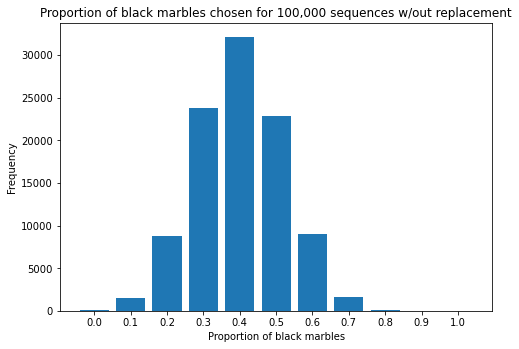

The mean of the black pebble proportion over all experiments is: 0.4


In [4]:
random.seed(270)

tenSequence = getPebbleSequence(10, replacement=False)
freqs = getFrequencies(tenSequence)

print(f"A selection of a random sequence of ten pebbles without replacement yields: {tenSequence}")
print(f"The proportion of the sample that is black: {freqs[1]}")

blackProp = []
for i in range(100000):
    blackProp.append(getFrequencies(getPebbleSequence(10, replacement=False))[1])
print(f"The distribution is discrete because it ,once again, can only be a value between 0 and 1 in 0.1 increments")

freqs = {0 : 0,
         0.1 : 0,
         0.2 : 0,
         0.3 : 0,
         0.4 : 0,
         0.5 : 0,
         0.6 : 0,
         0.7 : 0,
         0.8 : 0,
         0.9 : 0,
         1 : 0,}
# count occurrences of each proportion
for prop in blackProp:
    freqs[prop] += 1

# set up and show plot
fig = pp.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(freqs.keys(), freqs.values(), width=.08)
ax.set_title("Proportion of black marbles chosen for 100,000 sequences w/out replacement")
ax.set_ylabel("Frequency")
ax.set_xlabel("Proportion of black marbles")
ax.set_xticks(np.arange(0, 1.1, .1))
pp.show()

print(f"The mean of the black pebble proportion over all experiments is: {round(np.mean(blackProp), 4)}")

### 3.

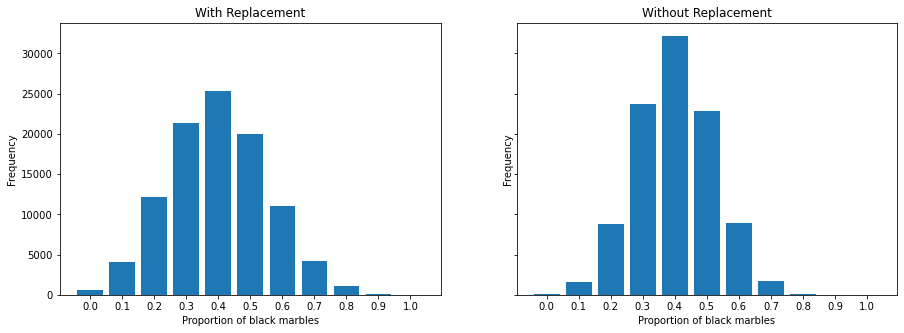

In [5]:
fig, ax = pp.subplots(1, 2, figsize=(15, 5), sharey=True)

ax1 = ax[0]
ax1.bar(freqsRep.keys(), freqsRep.values(), width=.08)
ax1.set_title("With Replacement")
ax1.set_ylabel("Frequency")
ax1.set_xlabel("Proportion of black marbles")
ax1.set_xticks(np.arange(0, 1.1, .1))

ax2 = ax[1]
ax2.bar(freqs.keys(), freqs.values(), width=.08)
ax2.set_title("Without Replacement")
ax2.set_ylabel("Frequency")
ax2.set_xlabel("Proportion of black marbles")
ax2.set_xticks(np.arange(0, 1.1, .1))

pp.show()

### 4.

The probability distribution would be constant, since it is one dice roll, and would be $\displaystyle f(x) = \frac{1}{6}$

### 5.

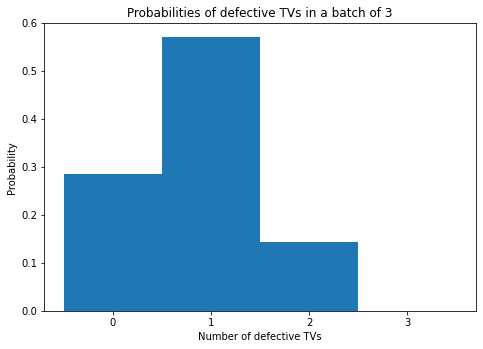

In [6]:
# total combinations = n!/k!(n - k)! = 35
TOTAL = 35
DEFECTIVE = 2
WORKING = 5

BATCH_SIZE = 3

# wdefining a hyper geometric distribution with good succs💦
def hyperGeo(pop, popSucc, obsSucc, sampleSize):
    return (sp.comb(popSucc, obsSucc) * sp.comb(pop - popSucc, sampleSize - obsSucc)) / sp.comb(pop, sampleSize)

hyperVals = [hyperGeo(DEFECTIVE + WORKING, DEFECTIVE, i, BATCH_SIZE) for i in range(4)]
xVals = [0, 1, 2, 3]

fig = pp.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(xVals, hyperVals, width=1)
ax.set_title("Probabilities of defective TVs in a batch of 3")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of defective TVs")
ax.set_xticks(xVals)
pp.show()

### 6.

P(X < 4) = 0.5926
P(3 ≤ X < 4) = 0.3333


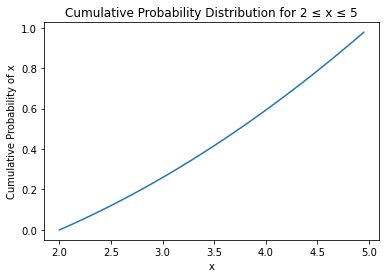

In [7]:
def density(x):
    return (2*(1+x)) / 27

print(f"P(X < 4) = {round(spi.quad(density, 2, 4)[0] , 4)}")
print(f"P(3 ≤ X < 4) = {round(spi.quad(density, 3, 4)[0] , 4)}")

xVals = np.arange(2, 5, .05)
data = [spi.quad(density, 2, i)[0] for i in xVals]
# evaluate the histogram
pp.plot(xVals, data)
pp.title("Cumulative Probability Distribution for 2 ≤ x ≤ 5")
pp.xlabel("x")
pp.ylabel("Cumulative Probability of x")

pp.show()

### 7.

In [8]:
f = lambda x, y : (x + y)/ 30

y = 1
aVals = [f(x, y) for x in range(3)]

x = 3
bVals = [f(x, y) for y in range(2)]

cVals = []
for x in range(4):
    for y in range(x):
        cVals.append(f(x, y))
        
dVals = []
for x in range(4):
    for y in range(3):
        if (x + y) == 4:
            dVals.append(f(x, y))

print(f"P(X ≤ 2, Y = 1) = {sum(aVals)}")
print(f"P(X > 2, Y ≤ 1) = {round(sum(bVals), 4)}")
print(f"P(X > Y) = {round(sum(cVals), 4)}")
print(f"P(X + Y = 4) = {round(sum(dVals), 4)}")

P(X ≤ 2, Y = 1) = 0.2
P(X > 2, Y ≤ 1) = 0.2333
P(X > Y) = 0.6
P(X + Y = 4) = 0.2667


### 8.

In [12]:
FALSE_POS = 0.1
TRUE_POS = 0.95

print(f"Positive reading for both subjects: {round(FALSE_POS * TRUE_POS, 4)}")
print(f"Positive for guilty subject, negative for innocent: {round((1 - FALSE_POS) * TRUE_POS, 4)}")
print(f"Probability of us really sucking at our jobs😎: {round((1 - TRUE_POS) * FALSE_POS, 4)}")
print(f"Positive for at least one: {round(((1 - TRUE_POS) * FALSE_POS) + (TRUE_POS * FALSE_POS) + (TRUE_POS * (1 - FALSE_POS)), 4)}")

Positive reading for both subjects: 0.095
Positive for guilty subject, negative for innocent: 0.855
Probability of us really sucking at our jobs😎: 0.005
Positive for at least one: 0.955


### 9.

In [10]:
sympA = 0.2
sympB = 0.3
both = 0.1
neither = 1 - (sympA + sympB + both)

print(f"Probability of having neither 🅱oronavirus symptoms: {neither}")
print(f"Probability of having at least one symptom of 🅱oronavirus: {sympA + sympB + both}")
print(f"Probability of someone having both symptoms given they have symptom 🅱: {both/(sympB + both)}")

Probability of having neither 🅱oronavirus symptoms: 0.4
Probability of having at least one symptom of 🅱oronavirus: 0.6
Probability of someone having both symptoms given they have symptom 🅱: 0.25


### 10.

Probability of the series lasting exactly five games = $\displaystyle p^{4}(1 - p) + p(1-p)^{4}$

### 11.

Probabilities of detecting accounting errors:
Probability of 0 error(s) detected - 0.85737
Probability of 1 error(s) detected - 0.04512
Probability of 2 error(s) detected - 0.00238
Probability of 3 error(s) detected - 0.00013


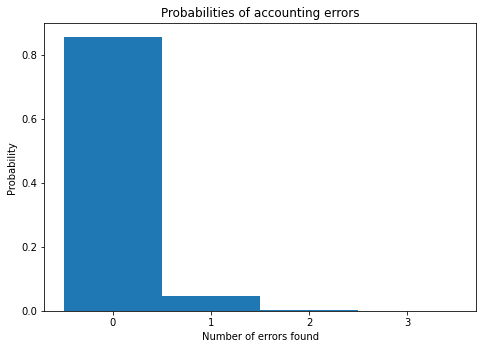

Probability of detecting more than one error: 0.0025


In [11]:
pErr = 0.05
pCorrect = 1 - pErr

dist = []
errVals = [0, 1, 2, 3]
print(f"Probabilities of detecting accounting errors:")
for i in errVals:
    prob = (pErr ** i) * (pCorrect ** (3 - i))
    dist.append(prob)
    print(f"Probability of {i} error(s) detected - {round(prob, 5)}")
    
fig = pp.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(errVals, dist, width=1)
ax.set_title("Probabilities of accounting errors")
ax.set_ylabel("Probability")
ax.set_xlabel("Number of errors found")
ax.set_xticks(errVals)
pp.show()

print(f"Probability of detecting more than one error: {round(dist[2] + dist[3], 5)}")